<a href="https://colab.research.google.com/github/Kraykray69/TIme-Series-for-Super-Store/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach for Time-Series Data
   
1. Load the data and libraries
2. EDA
3. Data Preparation
4. Time Series Decomposition
  1. Trend
  2. Seasonality
  3. Irregular Component
5. Check for Stationarity(Augmented Dickey Fuller Test)
6. Moving Average
7. Exponential Smoothing : Holt & Winters
8. ARMA , ARIMA , Prophet

# Load the libraries & dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('/content/Super_Store.csv',encoding='latin')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# Data preparation

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
cols_select = ['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [7]:
data_sales = data.drop(cols_select,axis=1)

In [8]:
data_sales.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [9]:
data_sales = data_sales.sort_values('Order Date')

In [10]:
print(data_sales['Order Date'].min())
print(data_sales['Order Date'].max())

1/1/2017
9/9/2017


In [11]:
data_sales.groupby('Order Date')['Sales'].sum()

Order Date
1/1/2017      975.4900
1/10/2014      51.9400
1/10/2015    1018.1040
1/10/2016     104.7700
1/11/2014       9.9400
               ...    
9/8/2016     3374.9816
9/8/2017     1000.2390
9/9/2014      864.0240
9/9/2016       15.0080
9/9/2017      482.5640
Name: Sales, Length: 889, dtype: float64

In [12]:
data_sales['Order Date'] = pd.to_datetime(data_sales['Order Date'])
data_sales.set_index('Order Date', inplace=True)
#data_sales
data_sales = data_sales.resample('MS').mean()
data_sales

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792
2014-06-01,440.204187
2014-07-01,327.910636
2014-08-01,305.014437
2014-09-01,425.294300


In [13]:
#data_sales = data_sales.resample('MS').mean()
#data_sales

In [14]:
data_sales.describe()

,Sales
count,48.000000
mean,346.478737
std,89.859062
min,206.044502
25%,300.079303
50%,334.581553
75%,386.478409
max,782.662773


In [15]:
data.values

array([[1, 'CA-2016-152156', '11/8/2016', ..., 2, 0.0, 41.9136],
       [2, 'CA-2016-152156', '11/8/2016', ..., 3, 0.0, 219.582],
       [4, 'US-2015-108966', '10/11/2015', ..., 5, 0.45, -383.031],
       ...,
       [9981, 'US-2015-151435', '9/6/2015', ..., 1, 0.0, 22.3548],
       [9990, 'CA-2014-110422', '1/21/2014', ..., 3, 0.2, 4.1028],
       [9991, 'CA-2017-121258', '2/26/2017', ..., 2, 0.0, 15.6332]],
      dtype=object)

In [16]:
data_sales.head()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792


# Visualization

<Axes: xlabel='Order Date'>

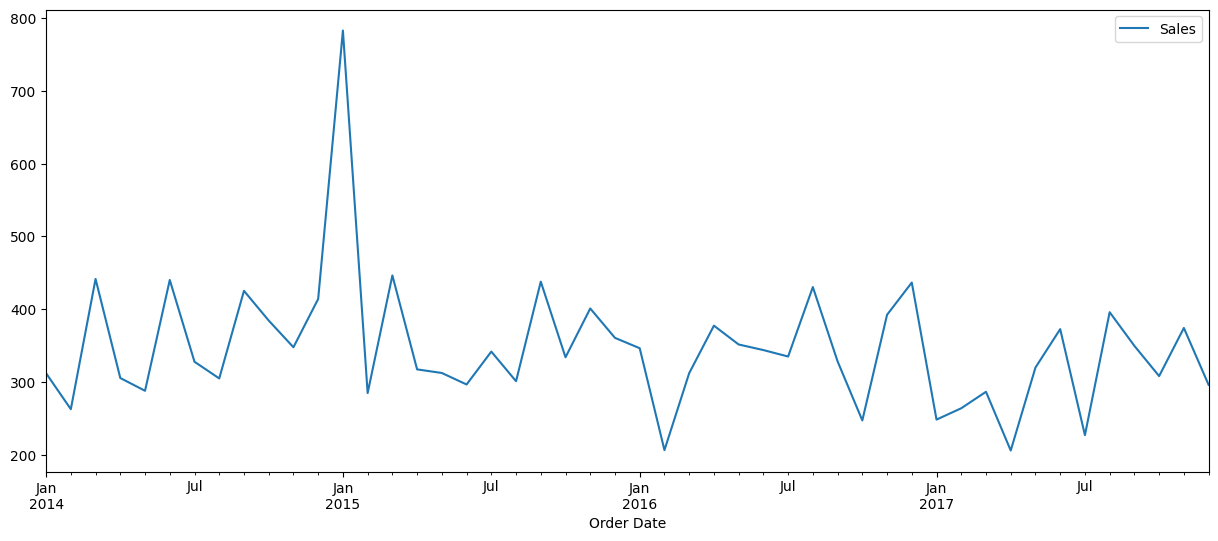

In [17]:
data_sales.plot(figsize=(15,6))

# Seasonal Decompose

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
series = data_sales
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    374.193980
2014-08-01    394.721952
2014-09-01    395.843644
2014-10-01    396.537833
2014-11-01    398.052013
2014-12-01    393.092036
2015-01-01    387.693906
2015-02-01    388.116466
2015-03-01    388.482340
2015-04-01    386.905447
2015-05-01    387.021881
2015-06-01    387.013984
2015-07-01    366.614267
2015-08-01    345.176367
2015-09-01    336.320775
2015-10-01    333.230934
2015-11-01    337.362959
2015-12-01    340.962498
2016-01-01    342.649705
2016-02-01    347.753039
2016-03-01    348.579497
2016-04-01    340.406881
2016-05-01    336.432430
2016-06-01    339.235603
2016-07-01    338.316789
2016-08-01    336.629079
2016-09-01    337.959488
2016-10-01    329.751323
2016-11-01    321.288243
2016-12-01    321.166778
2017-01-01    317.868371
2017-02-01    311.933890
2017-03-01    311.382148
2017-04-01    

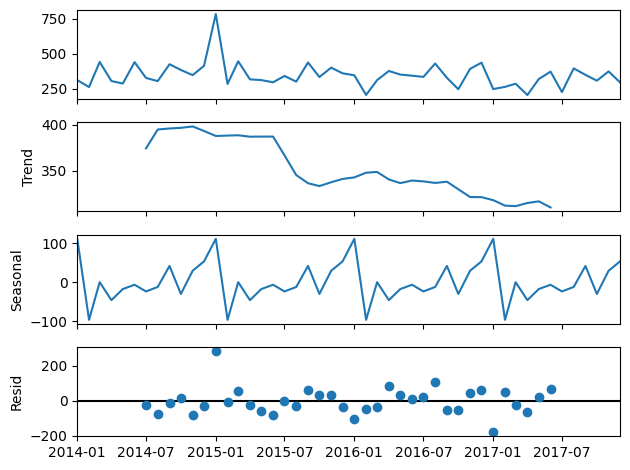

In [20]:
result.plot()
plt.show()

Based on the decomposition of dataset we found that there is a trend and seasonality , therefore the dataset is not stationary

# Augmented Dicky Fuller test

* Null hypothesis : The data is not stationary
* Alternate hypothesis : The data is stationary




In [21]:
adf_test = adfuller(data_sales)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.962405
p-value: 0.000000


# AutoCorrelation

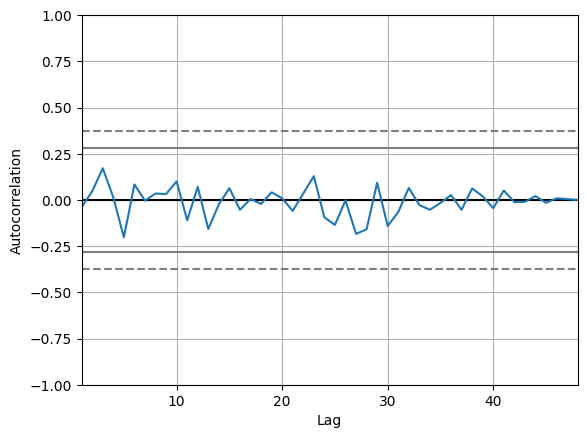

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_sales)
plt.show()

# Moving average

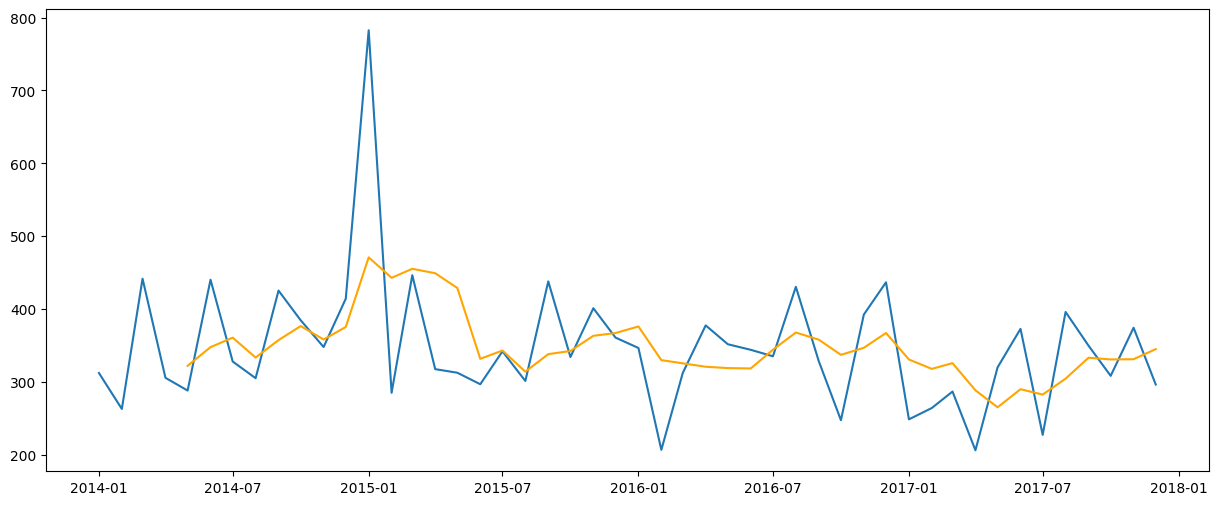

In [23]:
#Moving average
data_sales_MA = data_sales.rolling(window=5).mean()

plt.figure(figsize=(15,6))
# Plot original data
plt.plot(data_sales, label='Original Sales')

# Plot rolling mean data
plt.plot(data_sales_MA, label='Rolling Mean (5)', color='orange')
plt.show()

# Exponential Smoothing

* Simple Exponential Smoothing

2018-01-01    327.218973
Freq: MS, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

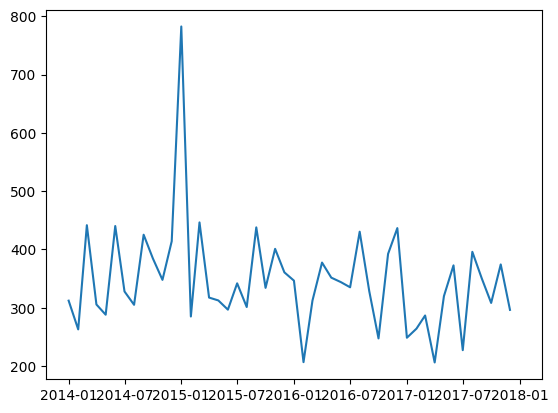

In [24]:
#Exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
#Simple exponential smoothing
#Fit model
model = SimpleExpSmoothing(data_sales)
model_fit = model.fit()
# Sales Prediction
yhat = model_fit.predict(len(data_sales),len(data_sales))
print(yhat)
#xplot
plt.plot(data_sales)
plt.plot(yhat,color='red')
plt.show

* Holt Winter's Exponential Smoothing

2018-01-01    370.132397
Freq: MS, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

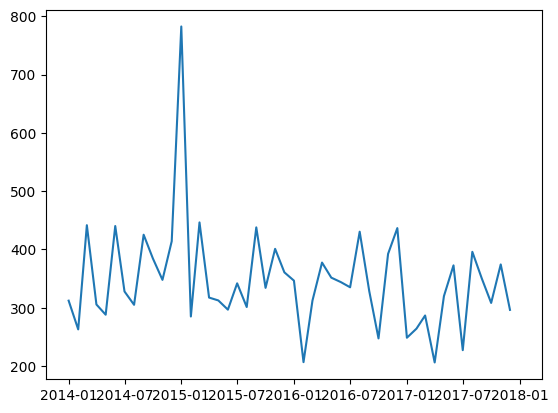

In [25]:
#Exponential smoothing
#Fit model
model = ExponentialSmoothing(data_sales,trend='add',seasonal='add',seasonal_periods=12)
model_fit = model.fit()
# Sales Prediction
yhat = model_fit.predict(len(data_sales),len(data_sales))
print(yhat)
#xplot
plt.plot(data_sales)
plt.plot(yhat,color='red')
plt.show

# SARIMAX
Seasonal Auto Regressive Integrated Moving Average with Explanatory variables

In [26]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data_sales,order=(3,1,3))
results = model.fit()


In [27]:
forecast = results.predict(start='2014-01-01',end='2017-12-01')
forecast

Order Date
2014-01-01      0.000000
2014-02-01    309.499503
2014-03-01    287.630469
2014-04-01    328.364383
2014-05-01    330.093316
2014-06-01    340.264476
2014-07-01    337.296566
2014-08-01    327.120297
2014-09-01    349.472859
2014-10-01    353.040761
2014-11-01    342.442390
2014-12-01    353.941044
2015-01-01    363.649887
2015-02-01    382.971618
2015-03-01    423.999899
2015-04-01    425.153213
2015-05-01    340.543557
2015-06-01    329.555420
2015-07-01    384.659173
2015-08-01    396.863037
2015-09-01    345.895048
2015-10-01    326.517743
2015-11-01    381.184923
2015-12-01    413.075211
2016-01-01    362.513534
2016-02-01    327.317630
2016-03-01    359.105511
2016-04-01    373.898184
2016-05-01    340.102050
2016-06-01    340.104972
2016-07-01    376.169173
2016-08-01    377.078805
2016-09-01    341.147158
2016-10-01    346.826181
2016-11-01    378.336588
2016-12-01    353.213339
2017-01-01    329.881546
2017-02-01    373.528851
2017-03-01    379.930044
2017-04-01    

In [28]:
data_sales

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792
2014-06-01,440.204187
2014-07-01,327.910636
2014-08-01,305.014437
2014-09-01,425.294300


In [29]:
from sklearn.metrics import mean_squared_error


In [30]:
actual = data_sales
predicted = forecast
print(mean_squared_error(actual,predicted))

9963.599184351448


In [31]:
rmse = np.sqrt(mean_squared_error(actual,predicted))
rmse

99.81782999219853

* Finding the best p,d,q values for SARIMAX using loop

In [90]:
import itertools
p = d = q = range(0, 10)
#Generate all different combinations of p,d,q
pdq = list(itertools.product(p, d, q))

#Initialize variables to store the best parameters and their rmse
best_rmse = float('inf') #can store infinite integer in the form of float
best_order = None

for param in pdq:
  try:
    model = sm.tsa.statespace.SARIMAX(data_sales,order=param)
    results = model.fit()
    predicted = results.predict(start='2014-01-01',end='2017-12-01')
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    if rmse < best_rmse:
      best_rmse = rmse
      best_order = param
    #print('ARIMA{} - AIC:{}'.format(param, results.aic))
  except:
    continue

#print(f"Best SARIMAX{best_order}12 - RMSE: {best_rmse}")
print(best_order,best_rmse)





/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

(6, 1, 6) 96.19906883015027


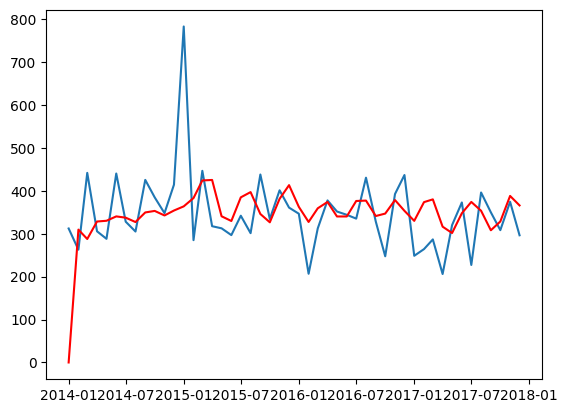

In [49]:
plt.plot(actual)
plt.plot(predicted,color='red')
plt.show()

# Prophet

In [60]:
from prophet import Prophet

In [61]:
df = pd.read_csv('/content/Super_Store.csv',encoding='latin')

In [62]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'DS', 'Y'],
      dtype='object')

In [63]:
cols_select =  ['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [64]:
df = data.drop(cols_select, axis=1)

In [65]:
df = df.sort_values('Order Date')

In [66]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

In [72]:
df = df.groupby('Order Date')['Sales'].sum()

In [73]:
prophet1 = Prophet()

In [71]:
df[['DS','Y']] = df[['Order Date','Sales']]

KeyError: "['Order Date'] not in index"

In [ ]:
model = prophet1.fit(df)